In [23]:
# importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

[1] Loaded in this way, each of the batch files contains a dictionary with the following elements:
* data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data

In [4]:
batch1 = unpickle('/content/drive/MyDrive/ML_F24_Team_Project/Dataset3/Image_Dataset/data_batch_1')
batch2 = unpickle('/content/drive/MyDrive/ML_F24_Team_Project/Dataset3/Image_Dataset/data_batch_2')
batch3 = unpickle('/content/drive/MyDrive/ML_F24_Team_Project/Dataset3/Image_Dataset/data_batch_3')
batch4 = unpickle('/content/drive/MyDrive/ML_F24_Team_Project/Dataset3/Image_Dataset/data_batch_4')
batch5 = unpickle('/content/drive/MyDrive/ML_F24_Team_Project/Dataset3/Image_Dataset/data_batch_5')
test = unpickle('/content/drive/MyDrive/ML_F24_Team_Project/Dataset3/Image_Dataset/test_batch')
batches = [batch1,batch2,batch3,batch4,batch5,test]

Below is a view of some of the images within batch 1. They have very low resolution since their dimensions are 32 x 32 pixels.

In [5]:
# the number they are label encoded as is their index
label_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

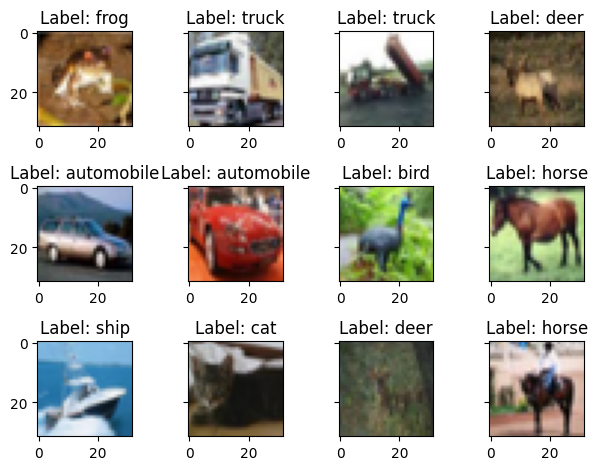

In [11]:
# Taking a peek at some of our samples

# Assuming 'data' key contains the image data and 'labels' key contains the labels
image_data = batch1[b'data']
labels = batch1[b'labels']

# Reshape the image data to the correct dimensions (32x32x3)
images = image_data.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)

fig, ax = plt.subplots(3,4,sharey=True,tight_layout=True)

# Display a few images with their labels
num_images_to_display = 12
count = 0
while (count < num_images_to_display):
    i = int(count/4)
    j = count % 4
    ax[i,j].imshow(images[count])
    ax[i,j].set_title(f"Label: {label_names[int(labels[count])]}")
    count += 1

plt.show()

# (a) Brief Exploration of Dataset

All information about this dataset is given in a file from its creators. [1]

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

There are two raw features: the image file itself, and its label.

There are no missing values. All images are labeled.

There is one categorical variable: the class that the image belongs to. These are label encoded in the following way:


*   1: airplane
*   2: automobile
*   3: bird
*   4: cat
*   5: deer
*   6: dog
*   7: frog
*   8: horse
*   9: ship
*   10: truck






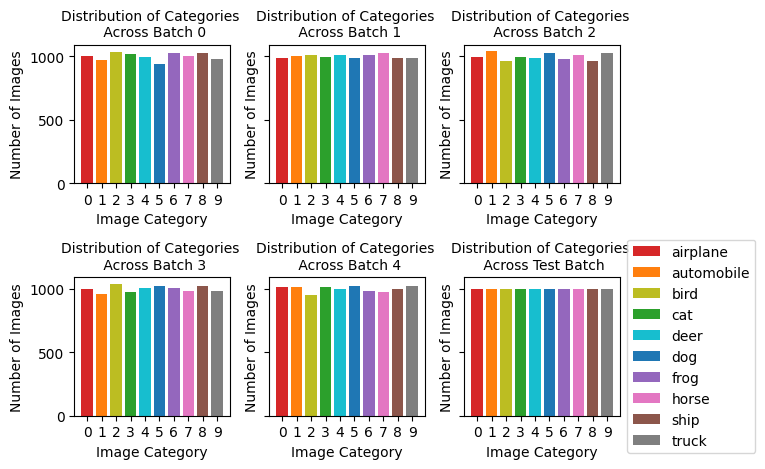

In [ ]:
count = 0
fig, ax = plt.subplots(2,3,sharey=True)

bar_labels = ['red', 'orange', 'olive', 'green', 'cyan', 'blue','purple','pink','brown',' gray']
bar_colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green','tab:cyan', 'tab:blue','tab:purple','tab:pink','tab:brown', 'tab:gray']

for batch in batches:
  i = int(count/3)
  j = count % 3
  image_data = batch[b'data']
  labels = batch[b'labels']
  label_counts = {}
  for label in labels:
      label_counts[label] = label_counts.get(label, 0) + 1

  idxs = np.array([list(label_counts.keys()),
                list(label_counts.values())])

  id = np.argsort(idxs[0,:])


  ax[i,j].bar(idxs[0,id], idxs[1,id], label=label_names, color=bar_colors)
  ax[i,j].set_xlabel("Image Category")
  ax[i,j].set_ylabel("Number of Images")
  ax[i,j].set_title(f"Distribution of Categories \n Across Batch {count}", fontsize = 10)
  ax[i,j].set_xticks(list(label_counts.keys()))#,label_names)
  count += 1
  #ax[i,j].legend()

fig.tight_layout()
ax[i,j].set_title("Distribution of Categories \n Across Test Batch", fontsize = 10)


# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
count = ['1','2','3','4','5','TEST']
i = 0
# calculate proportions of each clss for each batch
for batch in batches:
  print('Batch',count[i])
  i += 1

  image_data = batch[b'data']
  labels = batch[b'labels']
  label_counts = {}
  for label in labels:
      label_counts[label] = label_counts.get(label, 0) + 1

  idxs = np.array([list(label_counts.keys()),
                list(label_counts.values())])

  id = np.argsort(idxs[0,:])
  for label in label_names:
    print(label, ':', idxs[1,id][label_names.index(label)]/100,'%')

Batch 1
airplane : 10.05 %
automobile : 9.74 %
bird : 10.32 %
cat : 10.16 %
deer : 9.99 %
dog : 9.37 %
frog : 10.3 %
horse : 10.01 %
ship : 10.25 %
truck : 9.81 %
Batch 2
airplane : 9.84 %
automobile : 10.07 %
bird : 10.1 %
cat : 9.95 %
deer : 10.1 %
dog : 9.88 %
frog : 10.08 %
horse : 10.26 %
ship : 9.87 %
truck : 9.85 %
Batch 3
airplane : 9.94 %
automobile : 10.42 %
bird : 9.65 %
cat : 9.97 %
deer : 9.9 %
dog : 10.29 %
frog : 9.78 %
horse : 10.15 %
ship : 9.61 %
truck : 10.29 %
Batch 4
airplane : 10.03 %
automobile : 9.63 %
bird : 10.41 %
cat : 9.76 %
deer : 10.04 %
dog : 10.21 %
frog : 10.04 %
horse : 9.81 %
ship : 10.24 %
truck : 9.83 %
Batch 5
airplane : 10.14 %
automobile : 10.14 %
bird : 9.52 %
cat : 10.16 %
deer : 9.97 %
dog : 10.25 %
frog : 9.8 %
horse : 9.77 %
ship : 10.03 %
truck : 10.22 %
Batch TEST
airplane : 10.0 %
automobile : 10.0 %
bird : 10.0 %
cat : 10.0 %
deer : 10.0 %
dog : 10.0 %
frog : 10.0 %
horse : 10.0 %
ship : 10.0 %
truck : 10.0 %


All the batches have different proportions of each class, with the test batch having equal amounts of each class. However, all these proportions fall within 9-11%, so none of the batches have a class distribution that is extremely unbalanced.

# (b) Pre-Processing

In [ ]:
# looking at the values in data to find their data type
print(np.max(batch1[b'data']))
print(np.min(batch1[b'data']))
print(type (np.min(batch1[b'data'])))

255
0
<class 'numpy.uint8'>


Two things usually done for image preprocessing are:
*  Resizing all the images to a constant size.
*  Standardizing all the pixel values to be within the [0,1] range, usually done by dividing it by 255.

In this case, all the images in this dataset are already the same size (32 x 32 pixels, and 3 channels for RGB). However, the pixel values are currently of uint8 type, a common way to store images, which takes on values between [0, 255]. So to preprocess, we will standardize it to be between [0,1].

In [12]:
# Combine all training batches
train_data = np.concatenate([batch1[b'data'], batch2[b'data'],
                             batch3[b'data'], batch4[b'data'], batch5[b'data']])
train_labels = np.concatenate([batch1[b'labels'], batch2[b'labels'],
                               batch3[b'labels'], batch4[b'labels'], batch5[b'labels']])

# Test data
test_data = test[b'data']
test_labels = np.array(test[b'labels'])

# Reshape data to (num_samples, 32, 32, 3)
train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Normalize pixel values to range [0, 1]
train_data = train_data / 255.0
test_data = test_data / 255.0

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Confirming we did our pre-processing correctly
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Training labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000,)
Test labels shape: (10000,)


# (c) Feature Extraction/Feature Learning

One of our chose methods, K-nearest neighbors, requires feature extraction, so we will perform Principal Component Analysis.

In [49]:
def pca_transform(train_data, test_data):

  # Flatten images to 1D (samples x features)
  train_data_flat = train_data.reshape(train_data.shape[0], -1)  # 50000 x 3072
  test_data_flat = test_data.reshape(test_data.shape[0], -1)

  # Standardize the data
  scaler = StandardScaler()
  train_data_std = scaler.fit_transform(train_data_flat)
  test_data_std = scaler.transform(test_data_flat) # this might be data leakage

  # Initialize PCA with 50 components
  pca = PCA(n_components=50)

  # Fit PCA on the training data and transform it
  train_data_pca = pca.fit_transform(train_data_std)

  # Transform the test data
  test_data_pca = pca.transform(test_data_std)

  return train_data_pca, test_data_pca

# (d) Dataset Processing

## (i) Machine Learning Method 1

Explaining the Convolutional Neural Network we are using:
1. We feed the raw image into the model, describing the dimensions of the image.
2. Using 2-dimensional convolution, we move accross the image in windows of 3x3 pixels, using 32 different filters. This helps us detect big details, such as edges or textures
3. Downsampling the output of the last step by finding the maximum value in each 2x2 region, and pushing just that through. This helps us get just the important parts of those 32 filters.
4. Taking the output from the last step, we again perform 2-dimensional convolution, applying 64 different filters, again with window size of 3x3. This helps us detect medium details, such as shapes or patterns
5. Again, we downsample the output from the last step, keeping the important bits
6. This is the final time we perform a 2-dimensional convolution, with 64 different filters. This layer finds the small, precise details, such as faces
7. Feed the extracted data from the convolutional layers into a layer of 64 neurons, also with the ReLu function
8. Feed that into the output layer, which has 10 neurons, each for the classes in this dataset. Make the prediction as the neuron that gives the best score.

We are using the 'ReLu' activation function, or Rectified Linear Unit, which returns max(0,x), where x is the value put into the neuron.

In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10,
          validation_data=(test_data, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.3356 - loss: 1.7839 - val_accuracy: 0.5334 - val_loss: 1.3001
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 52ms/step - accuracy: 0.5677 - loss: 1.2158 - val_accuracy: 0.5837 - val_loss: 1.1517
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.6282 - loss: 1.0462 - val_accuracy: 0.6544 - val_loss: 0.9927
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.6719 - loss: 0.9367 - val_accuracy: 0.6655 - val_loss: 0.9629
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 45ms/step - accuracy: 0.7016 - loss: 0.8485 - val_accuracy: 0.6838 - val_loss: 0.9164
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 69ms/step - accuracy: 0.7258 - loss: 0.7884 - val_accuracy: 0.6806 - val_loss: 0.9149
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 52ms/step - accuracy: 0.7380 - loss: 0.7506 - val_accuracy: 0.6992 - val_loss: 0.8719
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.7

The first accuracy tells us how well our model performs on the training data, which gets better and better throughout the epochs.

The loss function here is the Sparse Categorical Cross Entropy loss function, which is given by
 *can someone help me insert that in*
 It looks at the probabilities that it assigned to each class for that image, and penalizes higher when the certainty for its true label is lower.

 The val_accuracy tells us the accuracy on the validation dataset, which also increases throughout the epochs.

 Similarly, the val_loss gives us the loss on the validation dataset, which shows a constant decrease until the end, when it starts increasing. When the val_loss increases, this tells us we may start to be overfitting on the training data, losing generalizability.

 As a note: this validation dataset does NOT refer to the test batch.

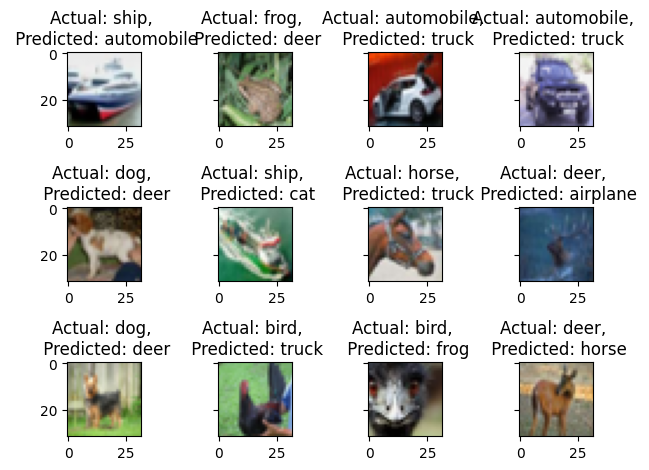

In [22]:
# Display some of the misclassified images with their actual and predicted labels
fig, ax = plt.subplots(3,4,sharey=True,tight_layout=True)

# Display a few images with their labels
num_images_to_display = 12
count = 0
while (count < num_images_to_display):
  id = misclassified_indices[count]
  i = int(count/4)
  j = count % 4
  ax[i,j].imshow(test_data[id])
  ax[i,j].set_title(f"Actual: {label_names[test_labels[id]]}, \n Predicted: {label_names[predicted_labels[id]]}", )
  count += 1

plt.tight_layout()
plt.show()

## (ii) Machine Learning Method 2

Metric to use for distance computation. Default is “minkowski”, which we have not changed for this method. 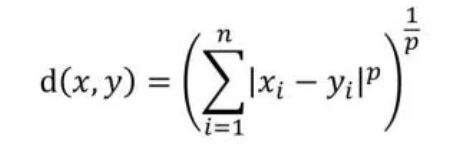

In [62]:
K_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [63]:
for K in K_values:
    print('K =', K)
    accuracies = []
    for fold_num in range(1,6):
      knn = KNeighborsClassifier(n_neighbors=K)

      # separating the training folds and validation fold
      training_batches = [1,2,3,4,5]
      training_batches.remove(fold_num)

      train_data = np.concatenate([batches[training_batches[0]][b'data'],
                                   batches[training_batches[1]][b'data'],
                                  batches[training_batches[2]][b'data'],
                                   batches[training_batches[3]][b'data']])

      train_labels = np.concatenate([batches[training_batches[0]][b'labels'],
                                     batches[training_batches[1]][b'labels'],
                                    batches[training_batches[2]][b'labels'],
                                     batches[training_batches[3]][b'labels']])

      val_data = batches[fold_num][b'data']
      val_labels = np.array(batches[fold_num][b'labels'])


      #feature extraction on batches, using training batches to fit
      train_data_pca, val_data_pca = pca_transform(train_data, val_data)


      knn.fit(train_data_pca, train_labels.ravel())
      val_predictions = knn.predict(val_data_pca)
      accuracy = accuracy_score(val_labels, val_predictions)
      accuracies.append(accuracy)
      print(f"Accuracy: {accuracy * 100:.2f}%")

    print('Average Accuracy:', np.mean(accuracies))

K = 1
Accuracy: 37.79%
Accuracy: 38.54%
Accuracy: 37.41%
Accuracy: 37.87%
Accuracy: 37.75%
Average Accuracy: 0.37872
K = 3
Accuracy: 36.79%
Accuracy: 38.08%
Accuracy: 36.72%
Accuracy: 36.73%
Accuracy: 37.38%
Average Accuracy: 0.37140000000000006
K = 5
Accuracy: 38.21%
Accuracy: 39.13%
Accuracy: 37.48%
Accuracy: 37.78%
Accuracy: 38.57%
Average Accuracy: 0.38234
K = 7
Accuracy: 38.47%
Accuracy: 38.86%
Accuracy: 38.18%
Accuracy: 38.61%
Accuracy: 39.51%
Average Accuracy: 0.38726
K = 9
Accuracy: 38.58%
Accuracy: 39.38%
Accuracy: 38.52%
Accuracy: 38.95%
Accuracy: 39.73%
Average Accuracy: 0.39032
K = 11
Accuracy: 38.56%
Accuracy: 39.25%
Accuracy: 39.22%
Accuracy: 39.12%
Accuracy: 40.14%
Average Accuracy: 0.39258000000000004
K = 13
Accuracy: 38.46%
Accuracy: 39.45%
Accuracy: 38.94%
Accuracy: 39.14%
Accuracy: 40.01%
Average Accuracy: 0.392
K = 15
Accuracy: 38.31%
Accuracy: 38.84%
Accuracy: 38.61%
Accuracy: 39.01%
Accuracy: 40.17%
Average Accuracy: 0.38987999999999995
K = 17
Accuracy: 38.22%
Acc

In [64]:
avg_accuracies = [0.37872, 0.37140000000000006, 0.38234, 0.38726, 0.39032, 0.39258000000000004, 0.392, 0.38987999999999995, 0.39052, 0.39032000000000006]

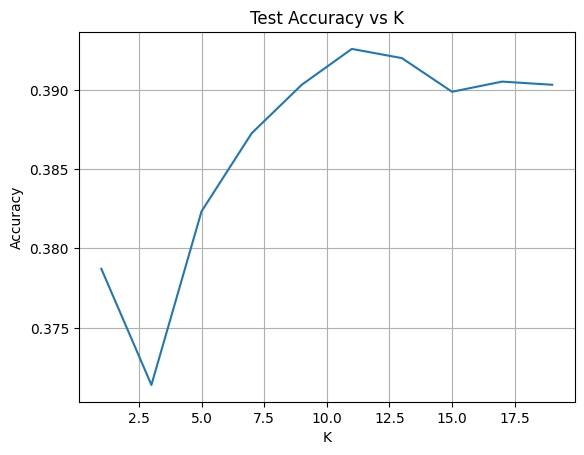

In [65]:
fig, ax = plt.subplots()
plt.plot(K_values, avg_accuracies)
plt.title('Test Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()

plt.show()

We can see that K = 11 has the best accuracy accross the validation folds with an average of 39.26%, so we will proceed using this parameter and test on the test folds.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)

# separating the training folds and validation fold

train_data = np.concatenate([batches[0][b'data'],
                             batches[1][b'data'],
                             batches[2][b'data'],
                             batches[3][b'data'],
                             batches[4][b'data']])

train_labels = np.concatenate([batches[0][b'labels'],
                               batches[1][b'labels'],
                               batches[2][b'labels'],
                               batches[3][b'labels'],
                               batches[4][b'labels']])

test_data = test[b'data']
test_labels = np.array(test[b'labels'])


#feature extraction on batches, using training batches to fit
train_data_pca, test_data_pca = pca_transform(train_data, test_data)


knn.fit(train_data_pca, train_labels.ravel())
test_predictions = knn.predict(test_data_pca)

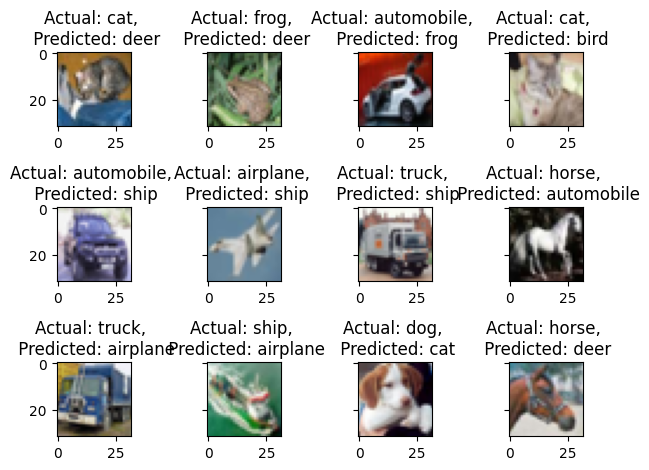

In [60]:
# Display some of the misclassified images with their actual and predicted labels
fig, ax = plt.subplots(3,4,sharey=True,tight_layout=True)

# Display a few images with their labels
num_images_to_display = 12
count = 0
while (count < num_images_to_display):
  id = misclassified_indices[count]
  i = int(count/4)
  j = count % 4
  ax[i,j].imshow(test_data[id].reshape(3, 32, 32).transpose(1, 2, 0))
  ax[i,j].set_title(f"Actual: {label_names[test_labels[id]]}, \n Predicted: {label_names[test_predictions[id]]}", )
  count += 1

plt.tight_layout()
plt.show()

# (e) Comparative Analysis of Two Methods

Provide a comparison between the two machine learning methods for each dataset across dimensions such as computational complexity,performance, etc., and a final recommendation on the method that should go into production for each dataset. This comparison should include both coding cells (e.g., overlayed plots, side-by-side confusion matrices, etc.) and markdown cells for discussion.

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Accuracy: 0.7049


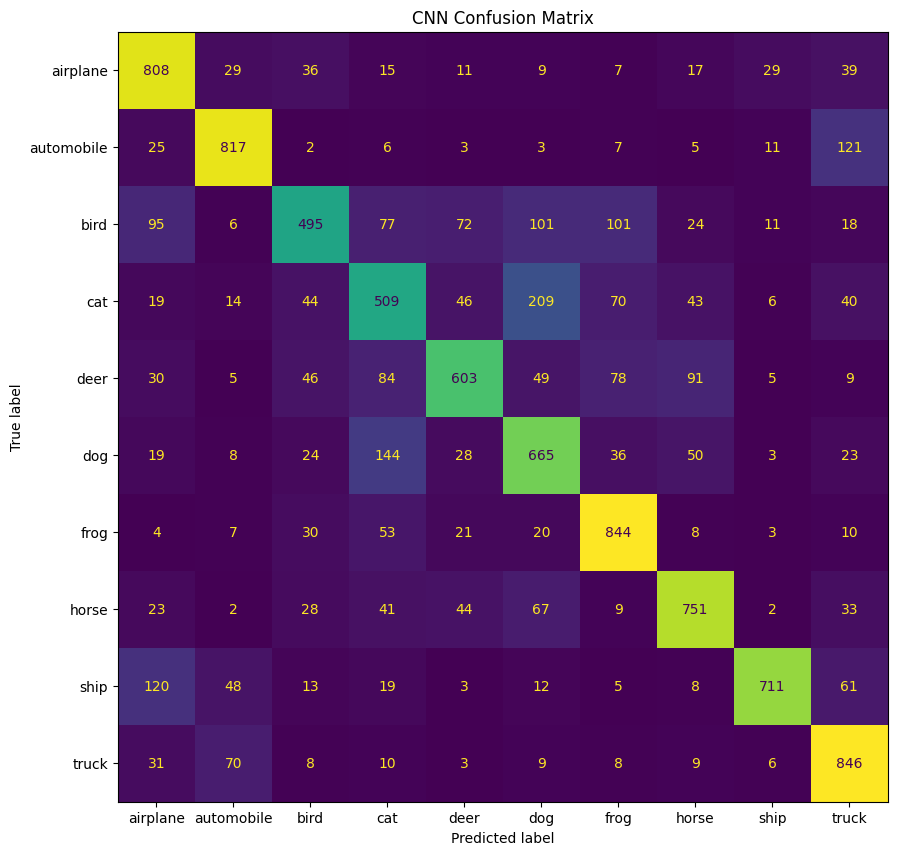

In [15]:
# Predict the labels for the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Find the misclassified images
misclassified_indices = np.where(predicted_labels != test_labels)[0]

# Accuracy
accuracy = (len(predicted_labels) - len(misclassified_indices)) / len(predicted_labels)
print("Accuracy:", accuracy)

# Confusion Matrix

cm = confusion_matrix(test_labels, predicted_labels)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # 2 rows, 3 columns for 6 folds

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap="viridis", ax=ax, colorbar=False)  # Use a consistent colormap
ax.set_title('CNN Confusion Matrix')  # Add titles to each subplot

plt.show()

Accuracy: 0.4088


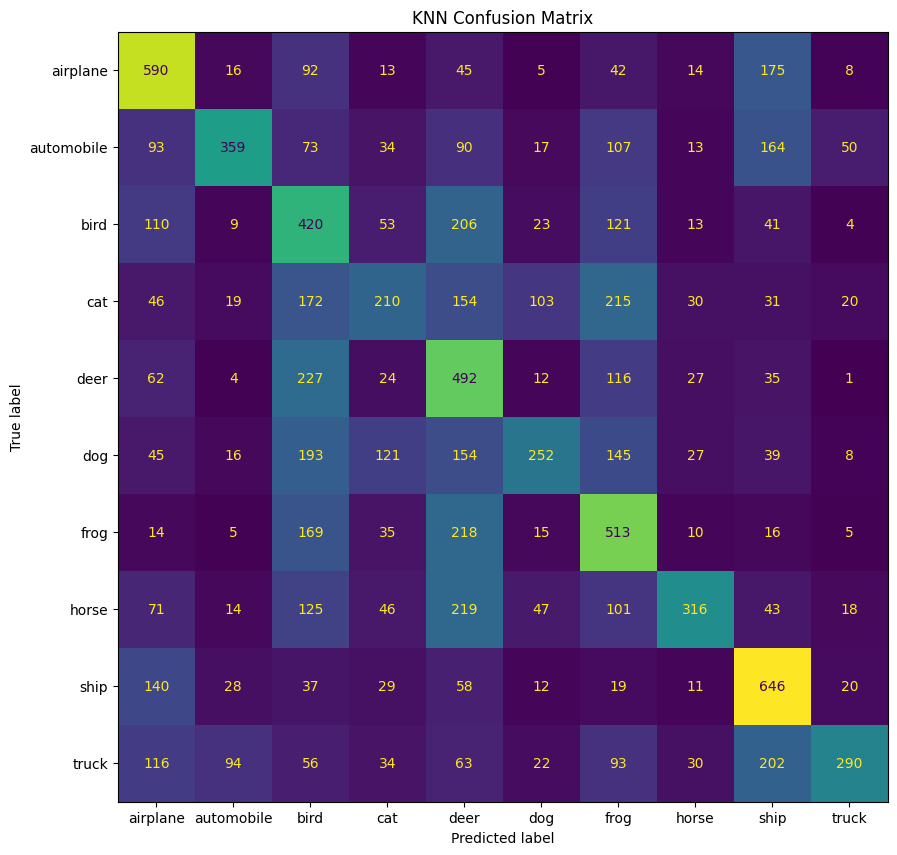

In [61]:
# Find the misclassified images
misclassified_indices = np.where(test_predictions != test_labels)[0]

# Accuracy
accuracy = (len(test_labels) - len(misclassified_indices)) / len(test_labels)
print("Accuracy:", accuracy)

# Confusion Matrix

cm = confusion_matrix(test_labels, test_predictions)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # 2 rows, 3 columns for 6 folds

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap="viridis", ax=ax, colorbar=False)  # Use a consistent colormap
ax.set_title('KNN Confusion Matrix')  # Add titles to each subplot

plt.show()

Out of both these models, the Convolutional Neural Network performed significantly better than the K-Nearest Neighbors model. They both have very high computational complexity, but the CNN seemed to make it worth it, while the K-NN model, not as much. Therefore, the Convolutional Neural Network should go into production.

# (f) Discussion on Ethical Issues

 Provide a discussion on the ethical aspects of the machine learning tasks that you carried out on the declared datasets. This discussion should be carried out in a markdown cell and should be carefully formatted for readability purposes.

Some ethical issues that this dataset can have are:

1. **Bias in Dataset Compositions**

CIFAR-10 have a set of 10 classes and some of the pictures that are included for the class may not represent a real-world diversity. For example, "automobile" or "truck" may only include specific models or designs (may only include the modern styles) and exclude other designs (older vehicles). In this case, the model trained on this data wouold fail in a diverse setting.

2. **Dataset Copyright Issues**

If the dataset includes images sourced from the internet and are used without clear permission, there could be the issue of copyright or intellectual propety. If it is the case that there are pictures in the dataset from the internet, this could also cause privacy concerns.

# (g) Bibliography

[1] https://www.cs.toronto.edu/~kriz/cifar.html
(pretty much describes everything to know about this dataset)

[2] Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

[3] https://www.tensorflow.org/tutorials/images/classification

Provide bibliographic references that helped you during the preparation of the notebook. These references, which should be provided in a markdown cell at the end of the notebook, should be referenced within the body markdown cells of each notebook as much as possible.